In [6]:
###
# In this notebook we explore the hpc jobs datasets from January, 2022 - December, 2022
###

In [5]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [6]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [7]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [13]:
df_jan = create_input_data.read_data(csv_file_name="../data/processed/lookback35_anon_jan1_feb1.csv", parse_dates_col=[4,5,6])

In [9]:
#df = create_input_data.read_data(csv_file_name="../data/processed/past_25_completed_qm.csv", parse_dates_col=[4,5,6])
df = create_input_data.read_data(csv_file_name="../data/processed/lookback35_anon_feb1_aug1.csv", parse_dates_col=[4,5,6])
df

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,9084275,5a1c85eb8bc9d4da20ce12b96ecc7bb9d79d3ef991e990...,38112a802292edea407a0678c9c75259cba6473c7acc62...,COMPLETED,2022-02-01 00:10:00,2022-02-01 00:10:02,2022-02-01 18:10:39,1,1,2880,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1,9084279,b4b4df9343fe9f7110ec15863fb5df13fbd20268383ba9...,9490a70089cec5b24a43f5f535efc92180fc5383256414...,COMPLETED,2022-02-01 00:11:44,2022-02-01 07:44:39,2022-02-01 09:00:46,78,6,180,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
2,9084280,c593da51b38e5fd95cb891ec53a4b70c41ca189bf4b92d...,3a61323a47592f74d9ca0004a066b2019b8fc1d4c53283...,COMPLETED,2022-02-01 00:12:27,2022-02-01 00:12:27,2022-02-01 00:12:39,68,1,1,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
3,9084291,db3b1cee65585e6744e72478a737eafaa23ce99e81344e...,118341ad5b87466ce69926005d0d6ba762bf86b8996da7...,COMPLETED,2022-02-01 00:16:45,2022-02-01 04:43:31,2022-02-01 06:15:04,64,1,2880,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
4,9084294,bb3cdc72e4a6895d67d00ccd3c9cf0f65bdc59f32dfa9e...,664af438b9c1ef9ba68a8105b0ce50f87b8bc462486043...,COMPLETED,2022-02-01 00:17:49,2022-02-01 00:17:51,2022-02-01 00:58:55,64,1,58,...,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,10056827,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:21,2022-08-01 00:02:54,2022-08-01 00:26:35,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323212,10056828,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:58:18,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323213,10056829,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:41:48,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323214,10056831,4c6876a9c556f9039eb938f387f82f71400b3eafa372b2...,140bedbf9c3f6d56a9846d2ba7088798683f4da0c24823...,COMPLETED,2022-07-31 23:58:28,2022-08-01 03:57:32,2022-08-01 06:07:16,100,2,180,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.iloc[56,]

jobid                                                         9084483
user                414ad679b891009c427106612bcc666435e62cebaa2844...
account             1940ae389c4d976607715c6b9c735c580c89a515c56029...
state                                                       COMPLETED
submit                                            2022-02-01 01:38:11
start                                             2022-02-01 01:39:10
end                                               2022-02-01 01:59:40
reqcpus                                                             1
nnodes                                                              1
max_minutes                                                        60
queue_minutes                                                       0
backlog_minutes                                                125060
backlog_num_jobs                                                  132
running_num_jobs                                                20383
running_minutes     

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['user'])
le.classes_

array(['000a9bbb25a5f1855875baf588735e127919bfc2b017dd9bdd64f4f407f2d6ce',
       '00189c5ab119850675a3c372d51391edb9dc7ebe590f84d74f3813edee88ca1a',
       '0073735d92549e097d0eaf36b332ce9648a14aab1bedfe7694ffe844aa92f294',
       ...,
       'ffb6bb5b388832c8597bceef25d5e1c9a1f85139eefa765c5182ad08319499ae',
       'ffe2d77f8f34dd3e382569c525bb854853e2b42a98fb47927d9a7b7a881f0b04',
       'fff34f7fd293ecfaae29ce80e47621afe2949dab749dce4b55fc254d6bf2eee8'],
      dtype=object)

In [36]:
import matplotlib.pyplot as plt
def plot_month(dfp,start,end,month_name):
    df1=dfp.query('submit >= @start and submit < @end')
    fig, axs = plt.subplots(2, 2,figsize=(10, 10))
   
    axs[0, 0].plot(df1['submit'],df1['backlog_num_jobs'],'r')
    axs[0, 0].set_title('backlog_num_jobs')
    plt.setp(axs[0, 0].xaxis.get_majorticklabels(),rotation=90)
    axs[0, 1].plot(df1['submit'],df1['queue_minutes'],'g')
    axs[0, 1].set_title('queue_minutes')
    plt.setp(axs[0, 1].xaxis.get_majorticklabels(),rotation=90)
    axs[1, 0].plot(df1['submit'],df1['qm10'],'m')
    axs[1, 0].set_title('qm10')
    plt.setp(axs[1,0].xaxis.get_majorticklabels(),rotation=90)
    axs[1, 1].plot(df1['submit'],df1['qm35'],'b')
    axs[1, 1].set_title('qm35')
    plt.setp(axs[1, 1].xaxis.get_majorticklabels(),rotation=90)
    #print(df1.iloc[80,:].describe())
    #plt.plot(df1['submit'],df1['backlog_num_jobs'],'r')
    #plt.xticks(rotation=90)
    #fig.xlabel(month_name)
    #plt.setp(axs[0, 0].xaxis.get_majorticklabels(), rotation=45)

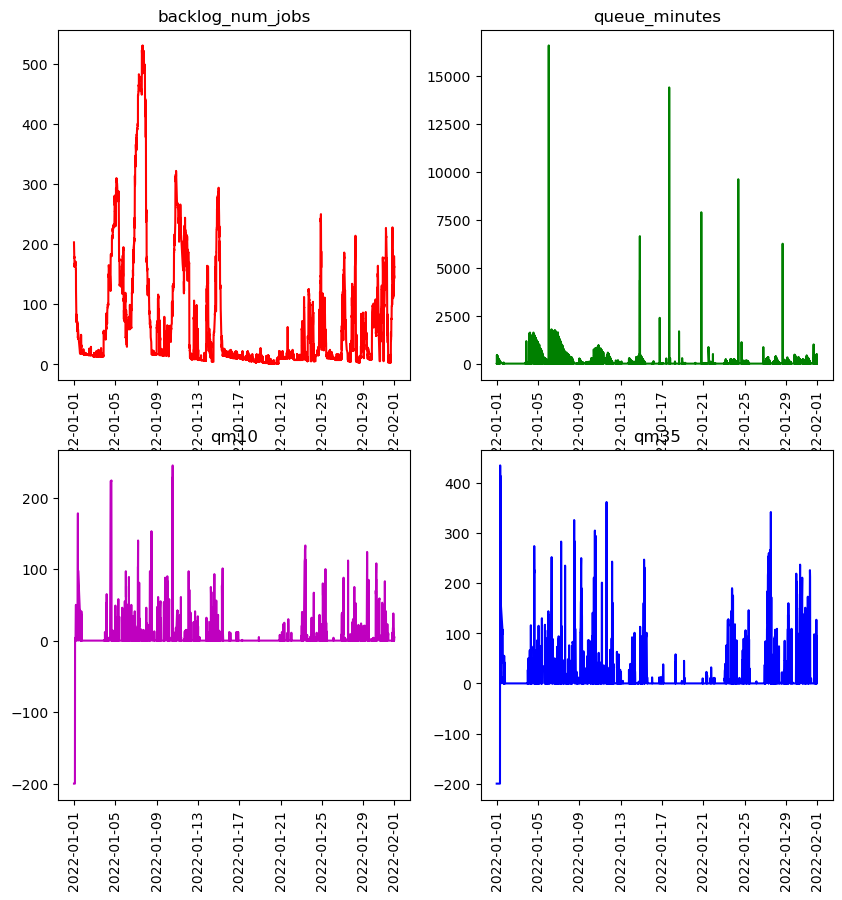

In [38]:
### Jan
plot_month(df_jan,"2022-01-01","2022-02-01","January")

In [39]:
df_jan.describe()

,jobid,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
count,3.349700e+04,33497,33497,33497,33497.000000,33497.000000,33497.000000,33497.00000,33497.000000,33497.000000,...,33497.000000,33497.000000,33497.000000,33497.000000,33497.000000,33497.000000,33497.000000,33497.000000,33497.000000,33497.000000
mean,9.027507e+06,2022-01-18 00:39:44.267725312,2022-01-18 02:07:57.138907648,2022-01-18 06:38:11.284294144,219.150431,5.424993,992.152372,87.99794,113035.261755,68.411082,...,7.365824,7.677016,7.887990,8.853032,8.844852,7.921157,8.875481,9.136311,9.330448,10.447742
min,8.966735e+06,2022-01-01 00:07:27,2022-01-01 00:07:29,2022-01-01 00:11:59,1.000000,1.000000,1.000000,0.00000,240.000000,1.000000,...,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,8.999075e+06,2022-01-11 15:18:19,2022-01-11 17:07:43,2022-01-11 20:10:53,16.000000,1.000000,120.000000,0.00000,18480.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.029350e+06,2022-01-18 20:37:24,2022-01-18 20:38:05,2022-01-18 23:58:50,64.000000,1.000000,480.000000,0.00000,34560.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.056500e+06,2022-01-25 05:14:17,2022-01-25 06:38:37,2022-01-25 11:26:10,128.000000,4.000000,1440.000000,34.00000,134520.000000,96.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,9.084251e+06,2022-01-31 23:59:26,2022-02-02 00:28:37,2022-02-02 21:07:25,17408.000000,256.000000,2880.000000,16588.00000,882640.000000,531.000000,...,362.000000,362.000000,382.000000,410.000000,417.000000,425.000000,428.000000,431.000000,435.000000,435.000000
std,3.404330e+04,NaN,NaN,NaN,613.412141,13.452614,1068.184456,338.55085,164570.770642,97.831346,...,28.732122,29.919825,29.692514,33.658031,32.602716,29.856458,32.217308,32.735409,33.315643,36.507960


,jobid,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
count,3.604300e+04,36043,36043,36043,36043.000000,36043.000000,36043.000000,36043.000000,3.604300e+04,36043.000000,...,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000
mean,9.147388e+06,2022-02-13 21:32:24.755181312,2022-02-14 02:03:58.177343488,2022-02-14 06:23:15.741641984,224.512055,5.919430,834.110202,271.203673,3.303512e+05,208.032156,...,14.801126,14.356935,15.588713,17.158894,16.331465,18.438670,16.819133,18.416364,18.455206,18.557029
min,9.084275e+06,2022-02-01 00:10:00,2022-02-01 00:10:02,2022-02-01 00:12:39,1.000000,1.000000,1.000000,0.000000,1.440000e+03,1.000000,...,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,9.111014e+06,2022-02-06 07:30:03.500000,2022-02-06 11:46:23,2022-02-06 18:21:44.500000,12.000000,1.000000,60.000000,0.000000,1.018500e+05,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.144952e+06,2022-02-13 19:06:45,2022-02-13 20:12:01,2022-02-13 23:57:08,64.000000,1.000000,240.000000,15.000000,2.688200e+05,187.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.181068e+06,2022-02-20 07:23:55,2022-02-20 07:51:06.500000,2022-02-20 16:16:58,240.000000,6.000000,1440.000000,295.000000,4.836660e+05,314.000000,...,5.000000,6.000000,6.000000,7.000000,8.000000,7.000000,7.000000,8.000000,9.000000,8.000000
max,9.224778e+06,2022-02-28 23:57:52,2022-03-10 13:00:33,2022-03-11 13:38:43,16384.000000,256.000000,2880.000000,28145.000000,1.143630e+06,701.000000,...,3287.000000,3239.000000,3288.000000,3290.000000,3239.000000,3291.000000,3269.000000,3269.000000,3269.000000,3284.000000
std,4.063170e+04,NaN,NaN,NaN,587.735253,13.134279,1068.181903,792.238949,2.771790e+05,152.088022,...,105.917713,83.027647,105.299908,109.005842,82.984530,103.974968,83.365072,94.912491,93.090815,96.593319


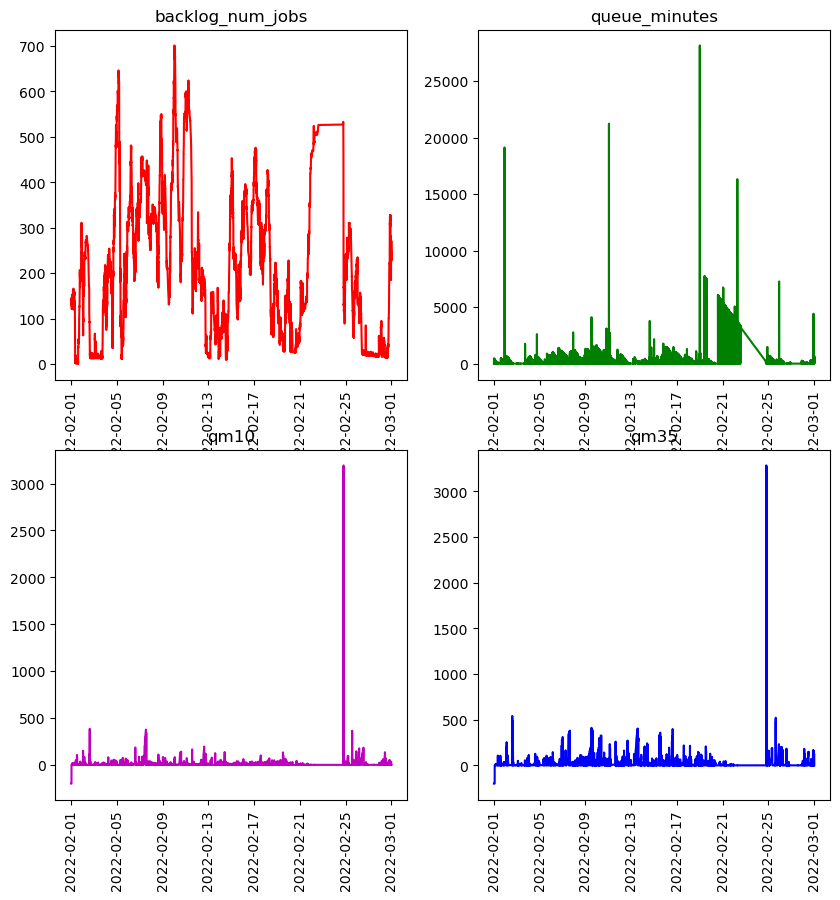

In [40]:
## Feb
plot_month(df,"2022-02-01","2022-03-01","February")
start="2022-02-01"
end="2022-03-01"
df1=df.query('submit >= @start and submit < @end')
df1.describe()

,jobid,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
count,4.484600e+04,44846,44846,44846,44846.000000,44846.000000,44846.000000,44846.000000,4.484600e+04,44846.000000,...,44846.000000,44846.000000,44846.00000,44846.000000,44846.000000,44846.000000,44846.000000,44846.000000,44846.000000,44846.000000
mean,9.305615e+06,2022-03-16 11:11:24.924474624,2022-03-16 14:15:13.998171648,2022-03-16 17:48:55.253155072,153.794564,4.749298,760.899723,183.380279,3.098411e+05,198.379789,...,18.862842,19.504371,19.67705,21.107033,20.977635,21.783972,23.375217,23.641729,23.243879,22.701088
min,9.224787e+06,2022-03-01 00:01:56,2022-03-01 00:01:57,2022-03-01 00:02:29,1.000000,1.000000,1.000000,0.000000,2.880000e+03,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.272350e+06,2022-03-09 12:40:19.249999872,2022-03-09 12:44:59.249999872,2022-03-09 13:39:00.500000,30.000000,1.000000,30.000000,0.000000,1.627500e+05,114.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.301312e+06,2022-03-14 21:37:26.500000,2022-03-15 00:44:36,2022-03-15 04:05:53.500000,68.000000,2.000000,120.000000,37.000000,2.565070e+05,193.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,9.343348e+06,2022-03-24 18:14:26.750000128,2022-03-24 22:40:04,2022-03-25 01:16:14.249999872,136.000000,4.000000,1200.000000,254.000000,4.326210e+05,270.000000,...,13.000000,14.000000,15.00000,16.000000,16.000000,17.000000,16.000000,17.000000,16.000000,16.000000
max,9.382732e+06,2022-03-31 23:57:28,2022-04-02 01:37:05,2022-04-03 03:46:17,17408.000000,256.000000,2880.000000,26005.000000,1.095237e+06,574.000000,...,476.000000,545.000000,564.00000,564.000000,564.000000,566.000000,566.000000,530.000000,566.000000,564.000000
std,4.335089e+04,NaN,NaN,NaN,382.093056,11.352787,1067.470426,503.953641,1.964085e+05,112.569123,...,43.193115,44.353320,45.46176,52.116598,48.834942,50.740762,57.877022,54.843709,55.590764,54.246708


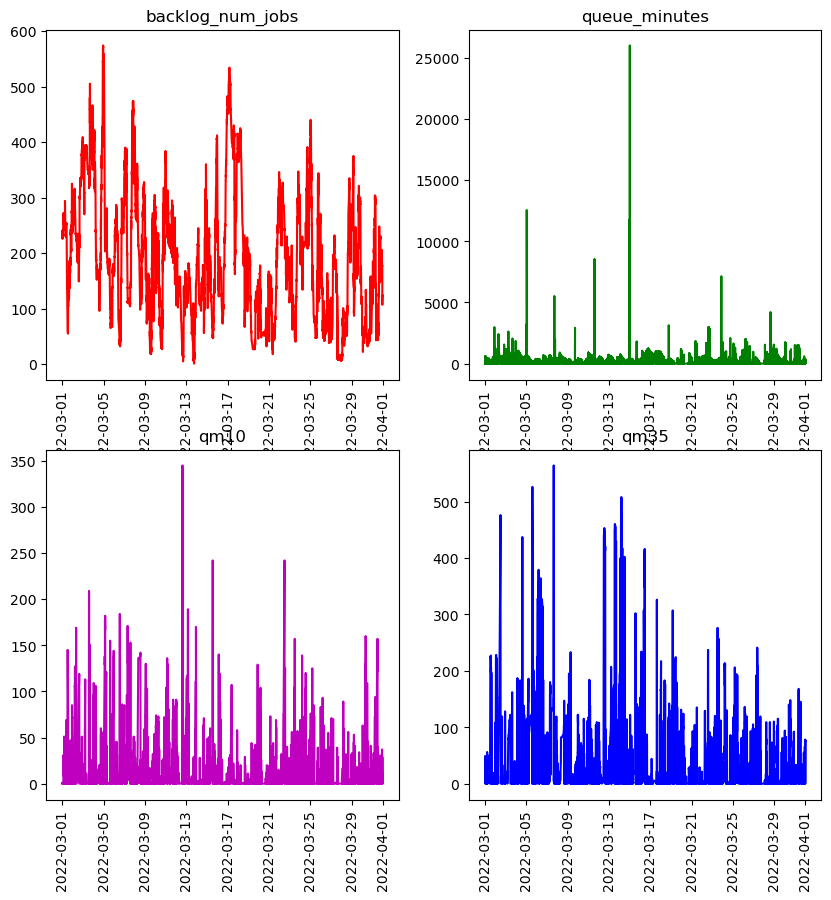

In [42]:
#MARCH Plot
plot_month(df,"2022-03-01","2022-04-01","March")
start="2022-03-01"
end="2022-04-01"
df1=df.query('submit >= @start and submit < @end')
df1.describe()

count    62427.000000
mean        37.737646
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max      15906.000000
std        219.241211
Name: queue_minutes, dtype: float64

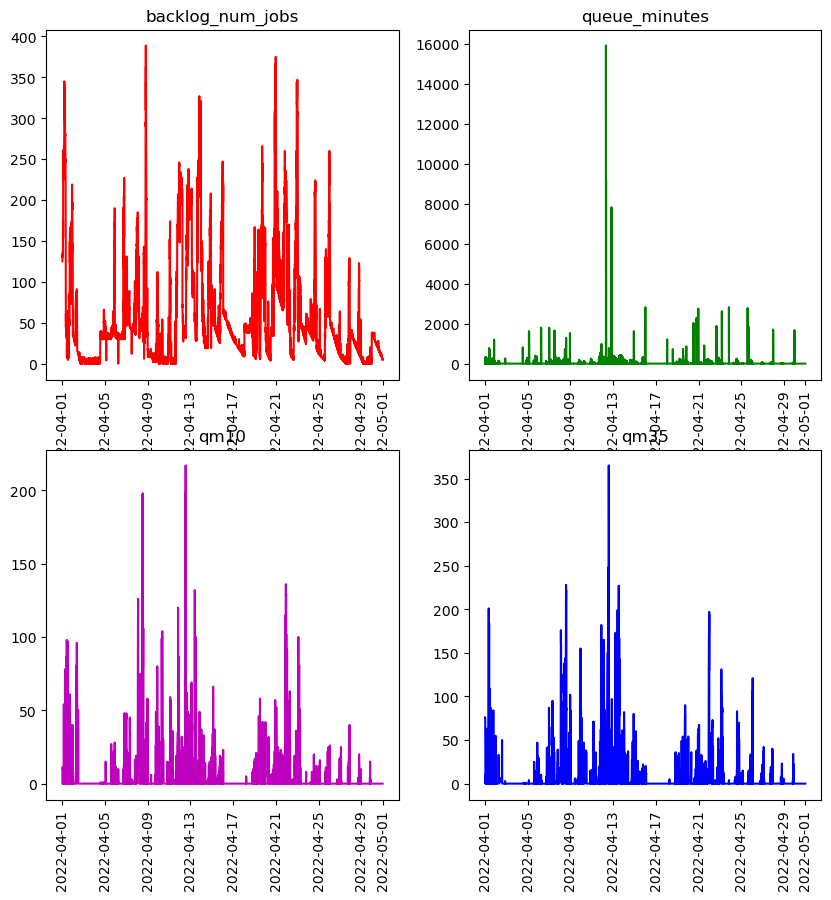

In [46]:
##April
plot_month(df,"2022-04-01","2022-05-01","April")
start="2022-04-01"
end="2022-05-01"
df1=df.query('submit >= @start and submit < @end')
df1.describe()['queue_minutes']

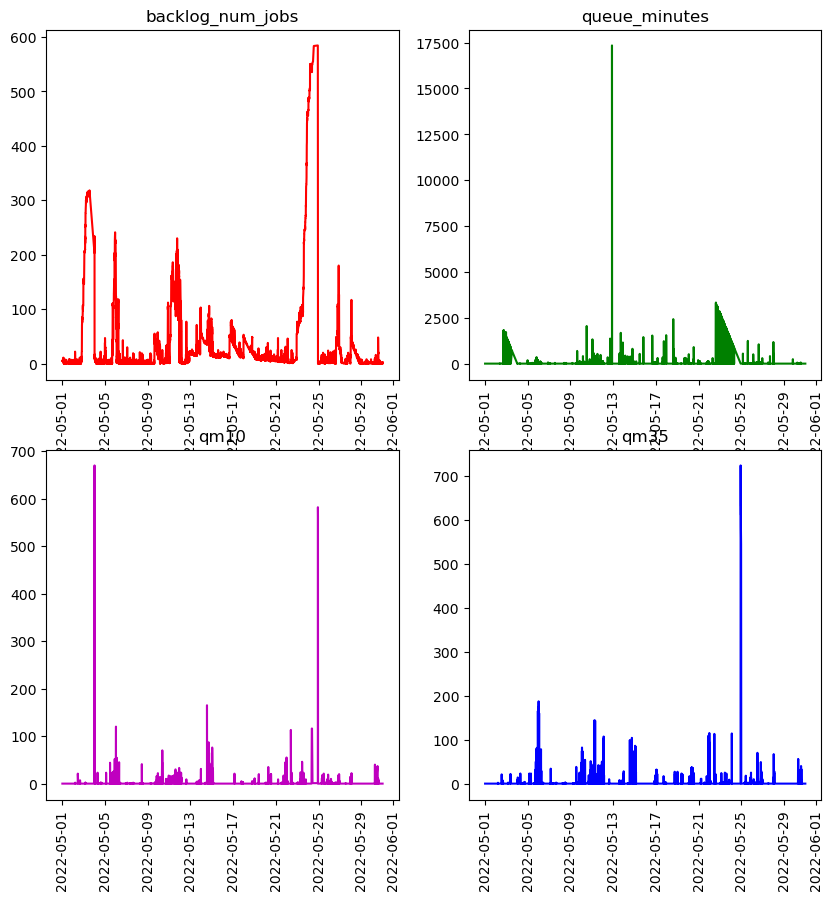

In [121]:
###May
plot_month(df,"2022-05-01","2022-05-31","May")

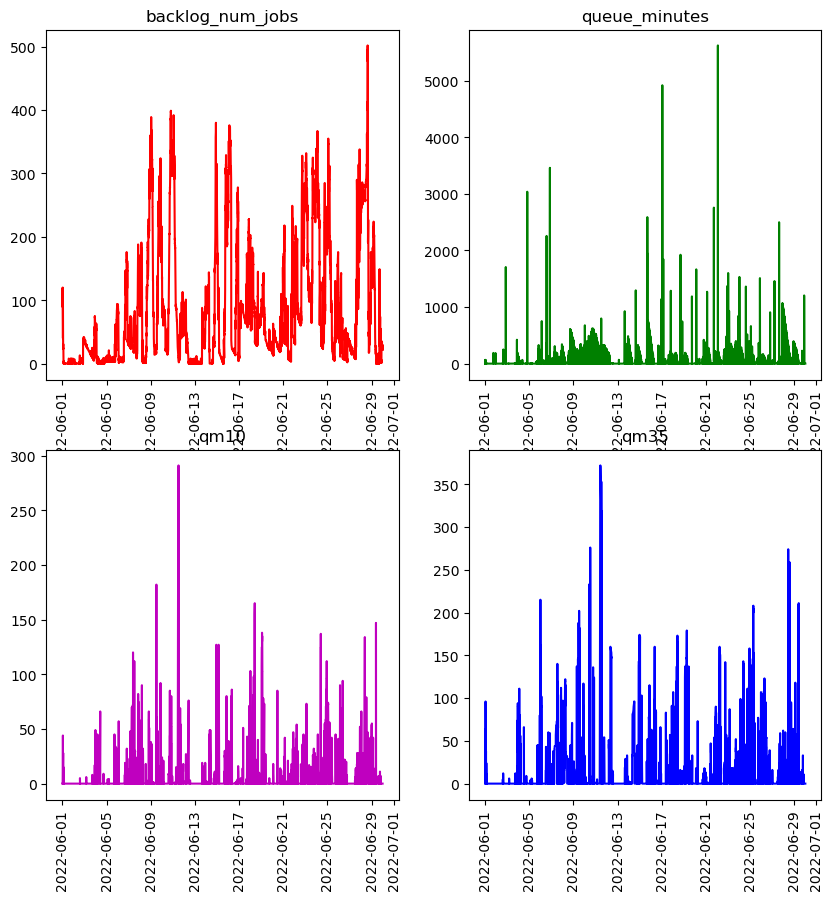

In [122]:
###June
plot_month(df,"2022-06-01","2022-06-30","June")

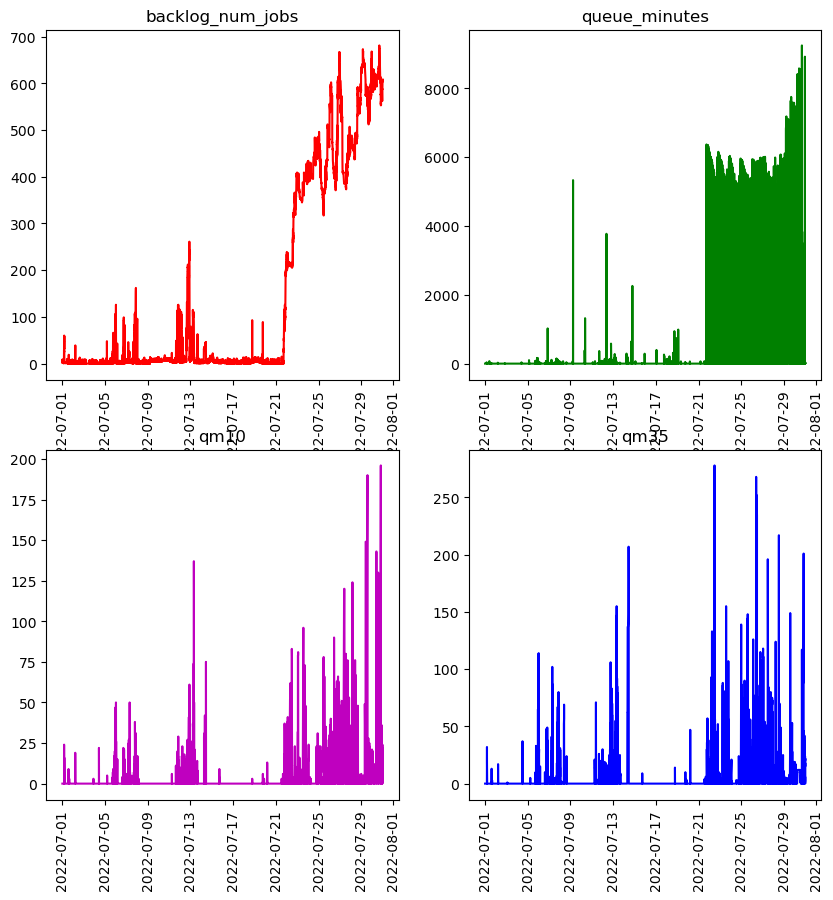

In [124]:
### July
plot_month(df,"2022-07-01","2022-07-31","July")

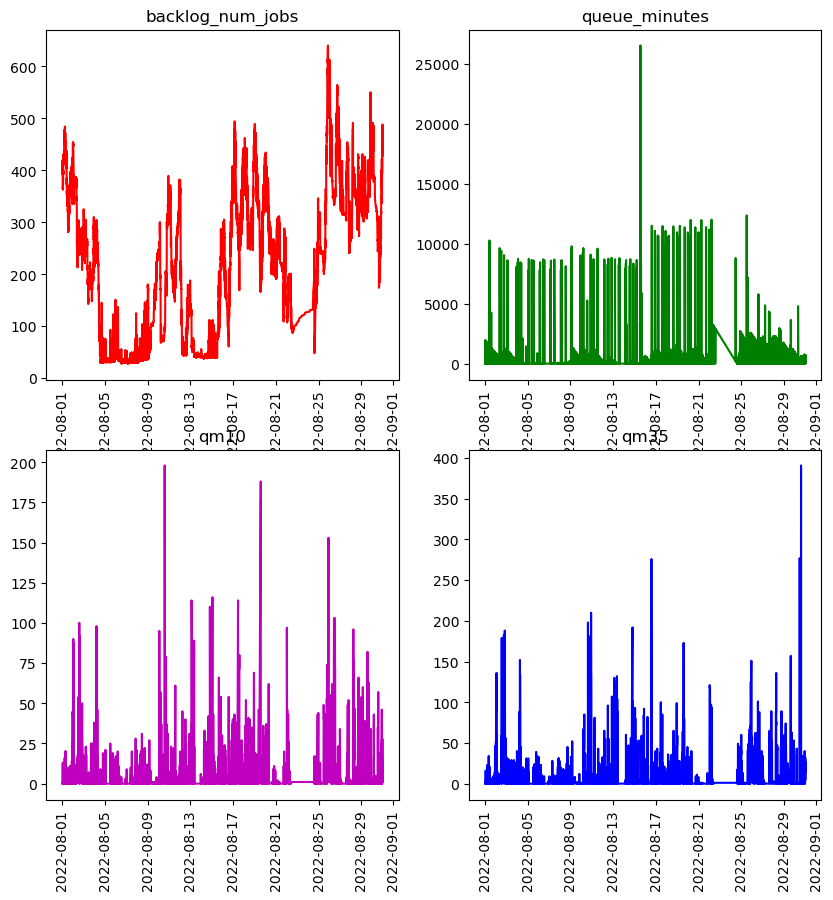

In [130]:
df_aug = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_aug_sept_past2022_35_completed_qm.csv", parse_dates_col=[4,5,6])
plot_month(df_aug,"2022-08-01","2022-08-31","August")

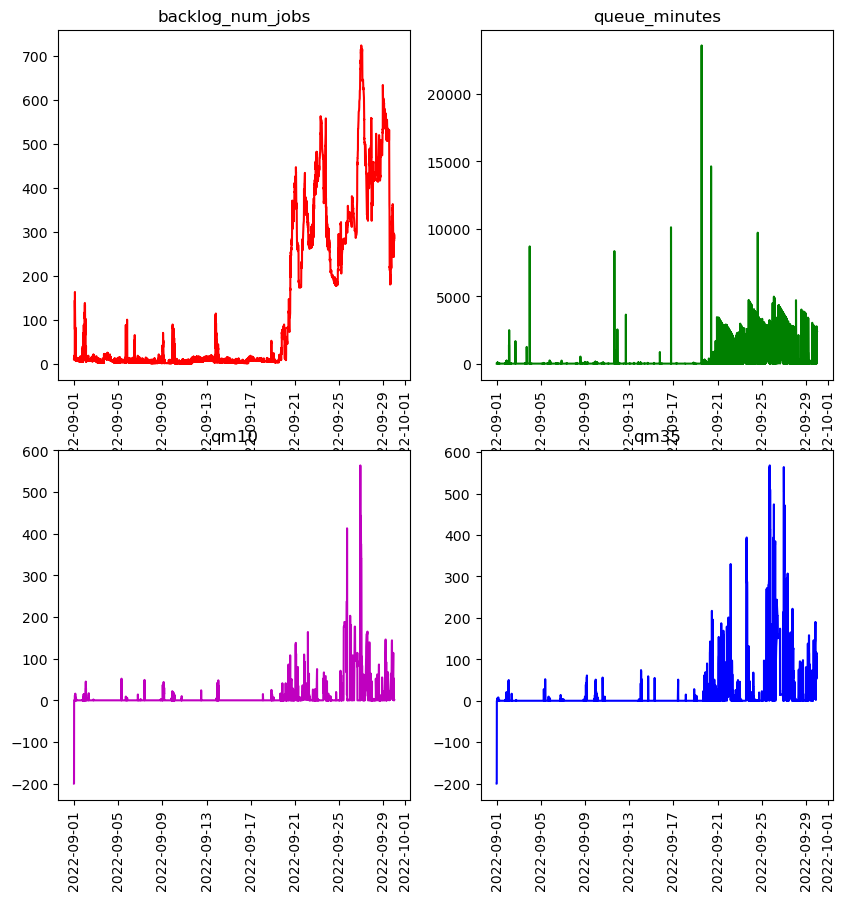

In [131]:
df_sept = create_input_data.read_data(csv_file_name="../data/processed/lookback35_anon_sept1_oct1.csv", parse_dates_col=[4,5,6])
plot_month(df_sept,"2022-09-01","2022-09-30","September")

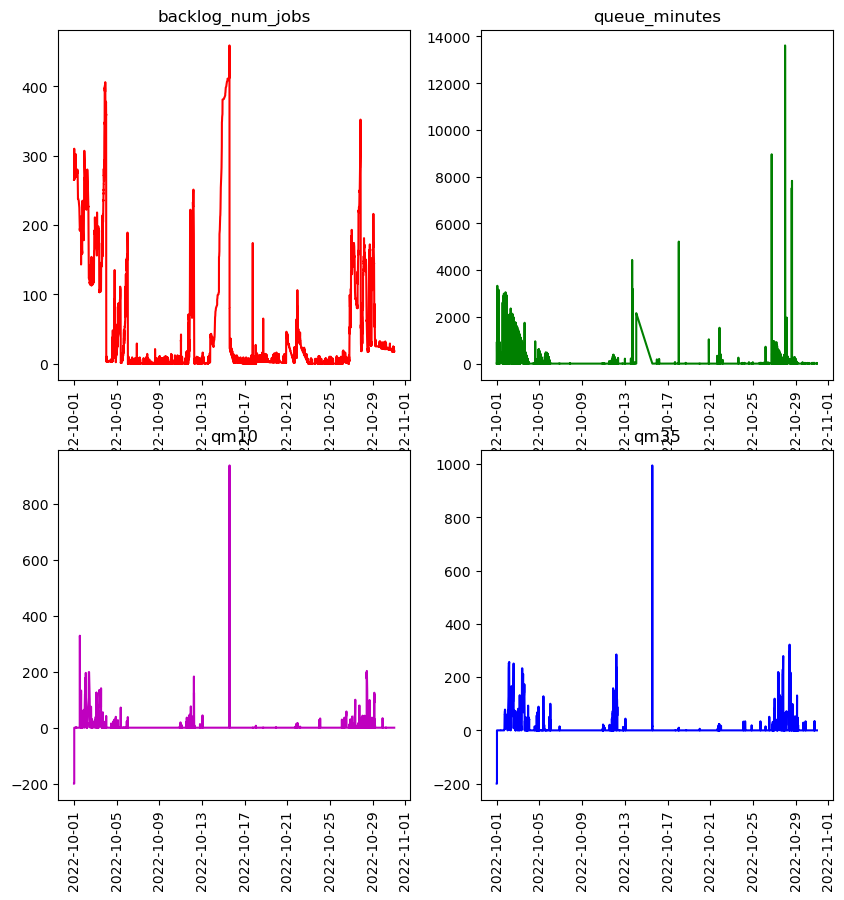

In [133]:
df_oct = create_input_data.read_data(csv_file_name="../data/processed/lookback35_anon_oct1_nov1.csv", parse_dates_col=[4,5,6])
plot_month(df_oct,"2022-10-01","2022-10-31","October")

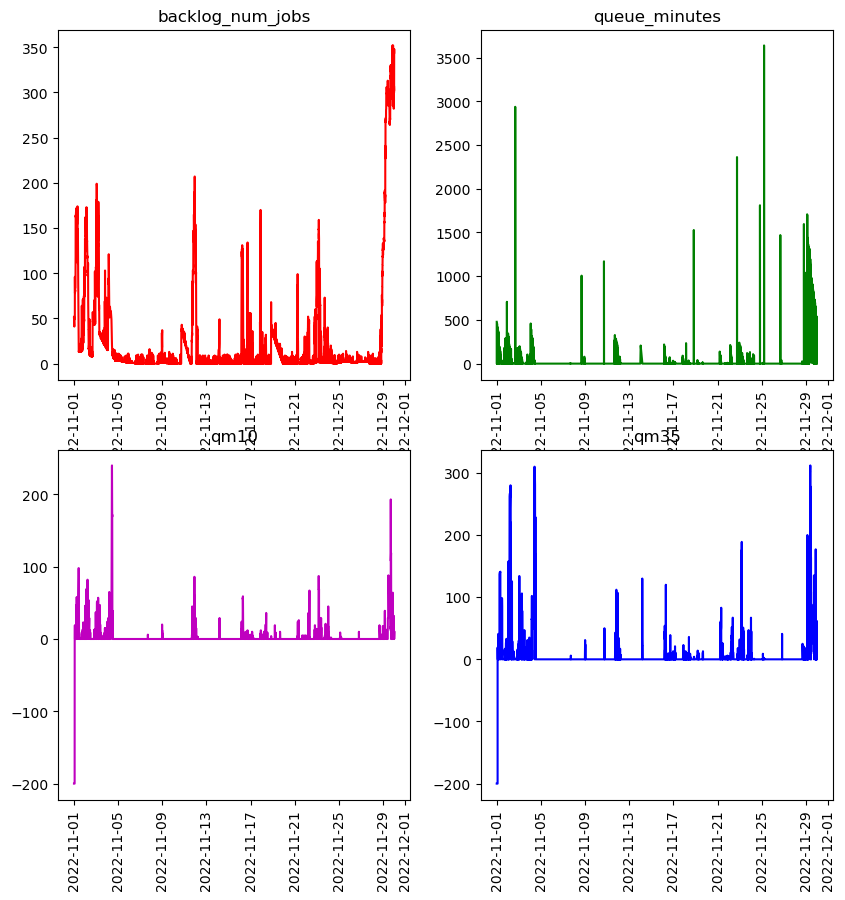

In [135]:
df_nov = create_input_data.read_data(csv_file_name="../data/processed/lookback35_anon_nov1_dec1.csv", parse_dates_col=[4,5,6])
plot_month(df_nov,"2022-11-01","2022-11-30","November")

In [ ]:
def get_all_months_stats(df):


In [152]:
from datetime import timedelta as td
print(df_nov.at[0,'submit'])
print(df_nov.at[0,'start'])
diff=df_nov.at[0,'start']-df_nov.at[0,'submit']
print(diff)
print(td.total_seconds(diff)/60)

2022-11-01 00:06:12
2022-11-01 08:05:05
0 days 07:58:53
478.8833333333333
